# 16 Classification Task dengan Random Forest
Referensi: https://en.wikipedia.org/wiki/Random_forest

## General ML Model Training

Proses training selalu diawali dengan training set yang berisikan x_train (features) dan y_train (target). Training set digunakan untuk melakukan training terhadap model machine learning yang menghasilkan trained model. Trained model yang terbentuk digunakan untuk melakukan prediksi terhadap data features baru _(x_new)_ yang akan menhasilkan nilai target yang baru _(y_pred)_.

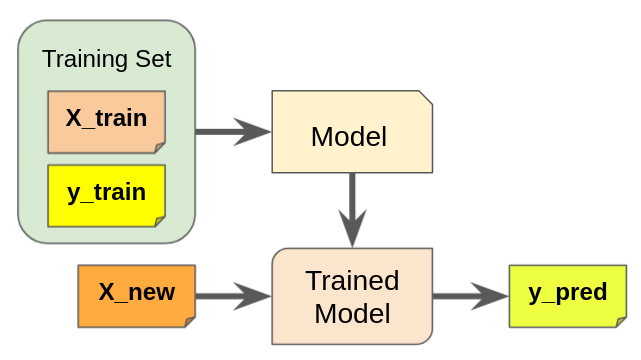

## Ensemble Learning: heterogeneous & homogeneous
Referensi: https://en.wikipedia.org/wiki/Ensemble_learning

Ensemble Learning juga diawali dari suatu training set, hanya saja kali ini training set yang tersedia akan kita gunakan untuk mentraining beberapa model, terdapat tiga model machine learning yang akan kita training yaitu 
* KNN
* SVM
* Decision tree.

Terdapat lebih dari satu prediksi, maka perlu disatukan dengan suatu mekanisme yang dikenal dengan istilah _Majority Voting_. Pada kasus Regression Task Majority Voting dilakukan dengan menggunakan nilai mean atau nilai rata-rata sedangkan pada kasus Classification Task Majority Voting dicapai dengan menerapkan mode atau kemunculan terbanyak-banyak, ilustrasi hasil prediksi final direpresentasikan sebagai _(y_pred final)_

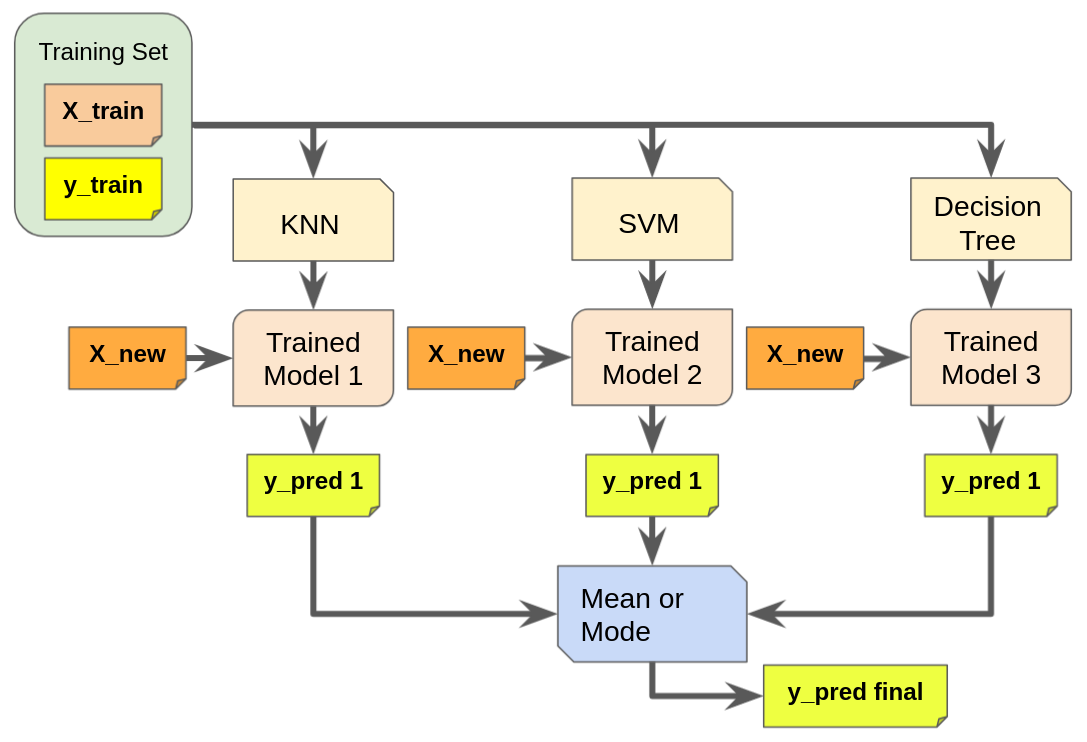

## Bagging: Bootstrap Aggregating
Referensi: https://en.wikipedia.org/wiki/Bootstrap_aggregating

Proses ini juga diawali dengan training set, hanya saja disini karena kita menerapkan sejumlah model yang sejenis, maka melakukan training terhadap setiap model menggunakan training set yang sama bisa dikatakan sia-sia. Karena akan menghasilkan trained model yang sama persis, disini kita akan berkenalan dengan suatu teknik yang dikenal dengan istilah bootstrap aggregating atau yang biasa disingkat *Bagging*.

Proses Bagging biasanya menggunakan random sampling with replacement terhadap training set yang dimiliki sehingga menghasilkan training set yang baru sejumlah dengan training model yang akan ditraining.

Pada gambar terdapat 3 Bag (Bag 1, Bag 2, Bag 3). Selanjutnya Bag ini akan digunakan untuk mentraining model machine learning yang sama. Kemudian barulah model yang sudah di training digunakan untuk melakukan prediksi terhadap data baru.

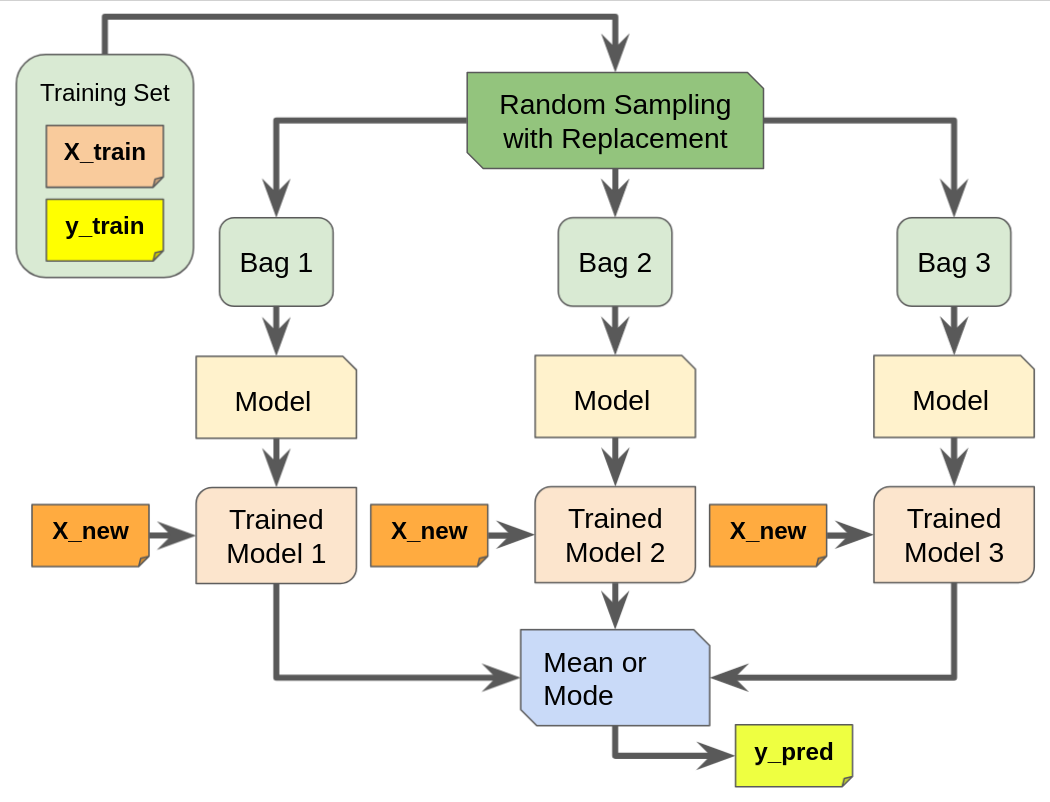

## Random Forest
Referensi: https://en.wikipedia.org/wiki/Random_forest

Random forest merupakan implementasi dari homogeneous ensemble learning yang menerapkan decision tree, terbentuk dari sekumpulan dari decision tree. Selain bagging, random forest juga menerapkan fitur randomness, karena untuk setiap bag yang dihasilkan akan mengadopsi sejumlah features yang dipilih secara acak dari training set sumbernya atau dengan kata lain disini setiap model decision tree akan di training dengan bag yang berisi dataset yang beragam. Tidak hanya dalam hal baris data aja,melainkan juga beragam dalam hal feature yang disertakan. karena tiap decision tree di training dengan menggunakan dataset yang berbeda, maka dihasilkanlah sejumlah trained model yang beragam juga, walau kesemua trained ini sebenarnya menggunakan model machine learning yang sejenis yaitu decision tree. 

Setiap trained model ini selanjutnya akan kita gunakan untuk melakukan prediksi terhadap sekumpulan nilai features yang baru. Prediksi yang dihasilkan oleh setiap trained model akan disatukan melalui proses majority voting untuk menghasilkan nilai prediksi final. Strategi semacam ini menjadikan random forest memiliki performa yang jauh lebih superior bila dibandingkan model decision tree yang biasa, karena setiap tree yang ada di trained menggunakan subset dari keseluruhan training set yang tersedia.

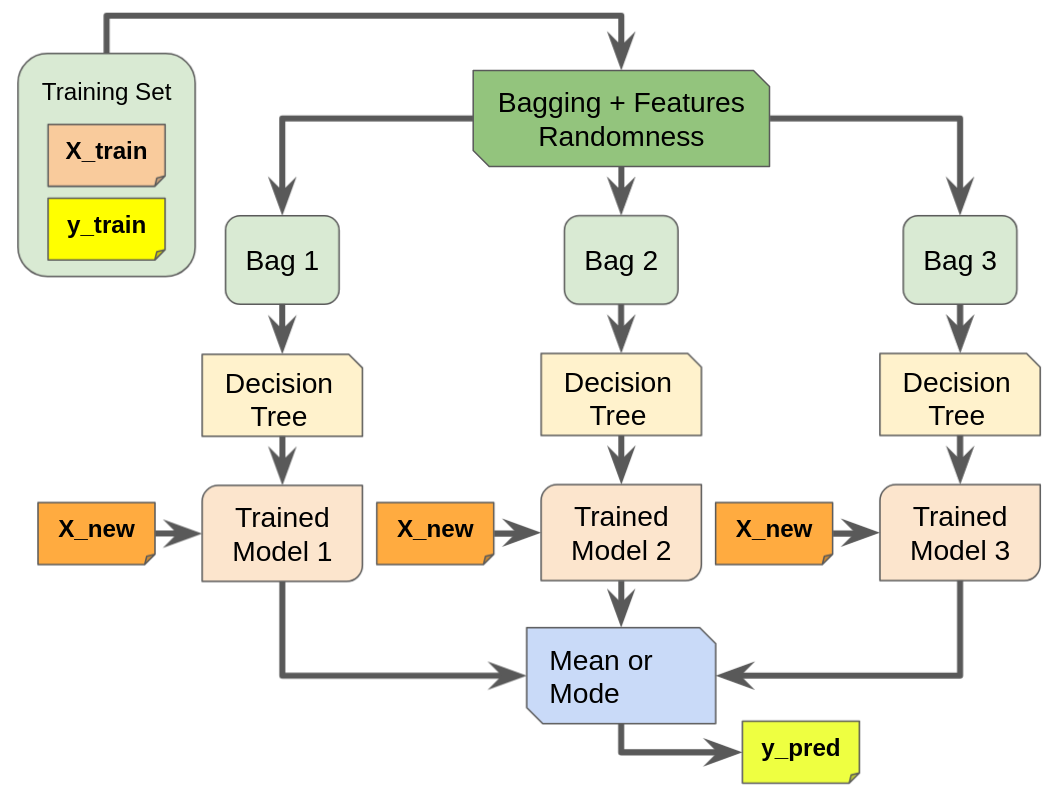

## Dataset
Referensi: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


Pada output diatas dapat dilihat bahwa dimensi data dari feature nya adalah (150, 4) yang berarti disini terdapat 150 baris dan 4 kolom, lalu terkait dengan class pada target labelnya diatas terdapat 3 buah class yaitu (0, 1, 2). Selanjutnya kita akan bagi dataset ini kedalam training dan testing set.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

## Classification dengan RandomForestClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, 
                               random_state=0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## Evaluasi Model

In [4]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

